In [10]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for clarity
warnings.filterwarnings('ignore')

# Set matplotlib to inline for Jupyter Notebook
%matplotlib inline

# Set plot style to ggplot
matplotlib.style.use('ggplot')

# Set seed for reproducibility
np.random.seed(34)

In [11]:
# Create a DataFrame with columns of various distributions
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,          # Beta distribution
    'exponential': np.random.exponential(10, 1000),   # Exponential distribution
    'normal_p': np.random.normal(10, 2, 1000),        # Normal platykurtic distribution
    'normal_l': np.random.normal(10, 10, 1000),       # Normal leptokurtic distribution
})

In [12]:
# Make a bimodal distribution by combining two normal distributions
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

# Add bimodal distribution to the DataFrame
df['bimodal'] = bimodal

In [13]:
# Create a list of column names for later use
col_names = list(df.columns)

<Axes: title={'center': 'Original Distributions'}, xlabel='beta', ylabel='Density'>

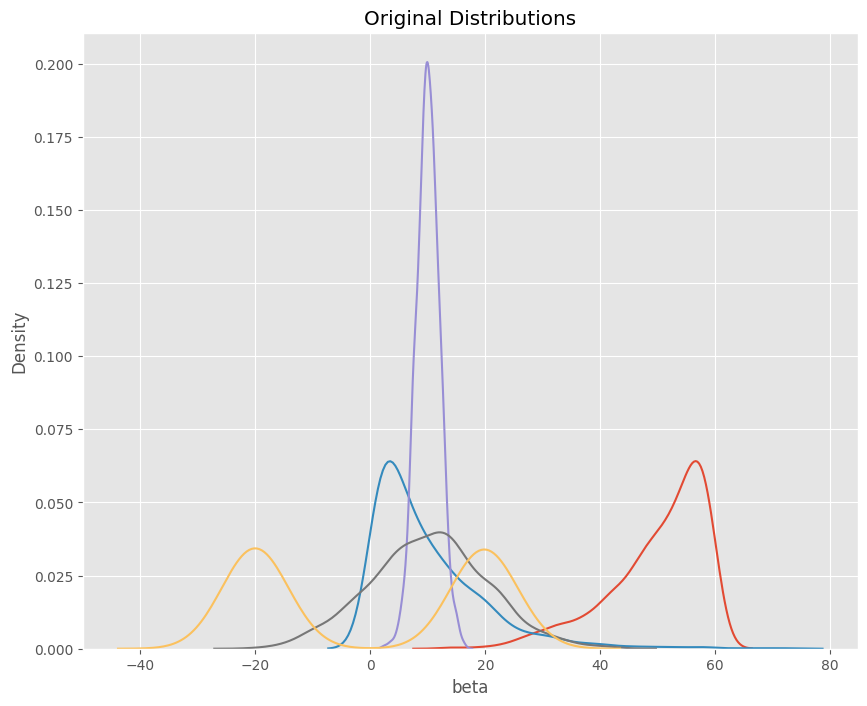

In [14]:
# Plot the original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

# Plot Kernel Density Estimation (KDE) plots for each column
sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1)

In [15]:
# Display the first few rows of the DataFrame
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,39.273740,2.263890,11.860245,4.748207,19.496627
1,55.030395,13.108592,11.796582,10.959172,16.871186
2,47.434682,3.312019,11.146945,3.919227,12.655741
3,43.173536,17.664301,8.266689,42.072915,18.657904
4,45.681443,2.109760,5.112983,16.960664,22.646439


In [16]:
# Calculate the mean for each column
df.mean()

beta           50.024249
exponential    10.028387
normal_p        9.994006
normal_l       10.175745
bimodal        -0.076622
dtype: float64

In [17]:
# Generate descriptive statistics for the DataFrame
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745,-0.076622
std,8.474545,9.733928,2.013971,10.104004,20.165208
min,13.854022,0.007617,2.356844,-19.539980,-28.709856
25%,45.793283,2.951421,8.687478,3.566822,-19.995311
50%,52.337504,7.018565,9.983498,10.326331,0.237049
75%,56.722191,14.022485,11.306914,16.615057,19.891202
max,59.990640,71.344341,16.214364,42.072915,28.252151


<Axes: >

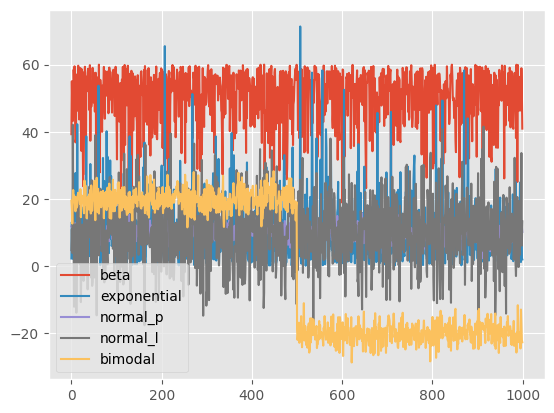

In [18]:
# Plot all columns in the DataFrame
df.plot()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.024249,10.028387,9.994006,10.175745,-0.076622,1.000259e+06
std,8.474545,9.733928,2.013971,10.104004,20.165208,9.935564e+03
min,13.854022,0.007617,2.356844,-19.539980,-28.709856,9.692079e+05
25%,45.793283,2.951421,8.687478,3.566822,-19.995311,9.936191e+05
50%,52.337504,7.018565,9.983498,10.326331,0.237049,1.000241e+06
75%,56.722191,14.022485,11.306914,16.615057,19.891202,1.007335e+06
max,59.990640,71.344341,16.214364,42.072915,28.252151,1.040677e+06


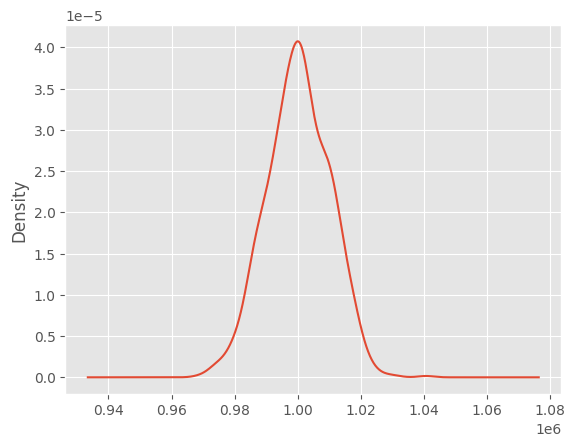

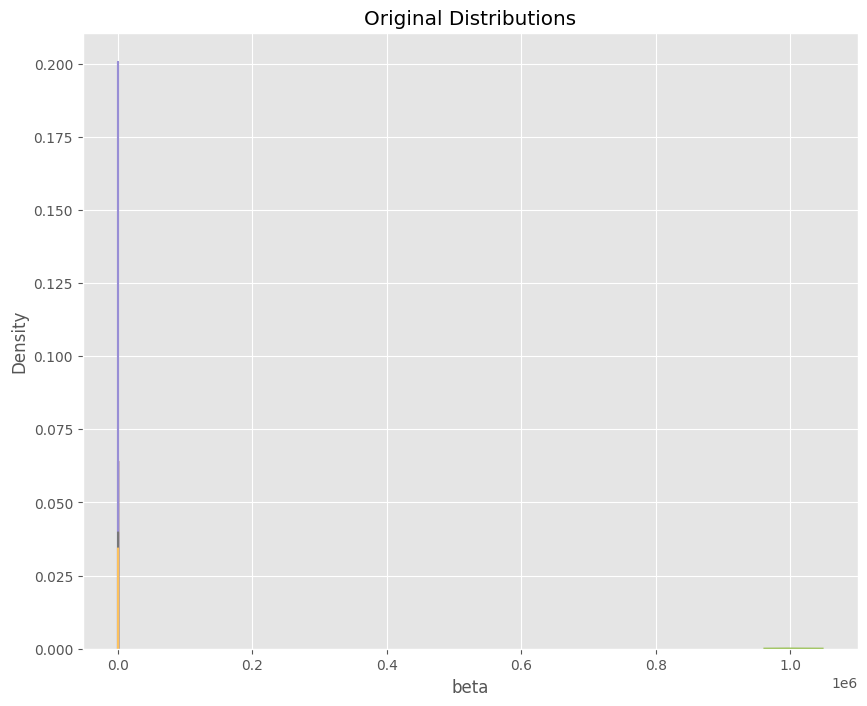

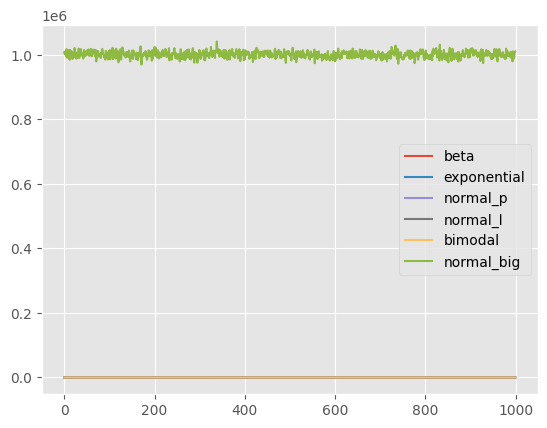

In [19]:
# Generate a normal distribution of large values
normal_big = np.random.normal(1000000, 10000, (1000, 1))
df['normal_big'] = normal_big

# Append 'normal_big' to the column names list
col_names.append('normal_big')

# Plot Kernel Density Estimation (KDE) for the 'normal_big' column
df['normal_big'].plot(kind='kde')

# Calculate the mean for the 'normal_big' column
df.normal_big.mean()

# Plot the original distribution plot with the larger value feature
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

# Plot KDE plots for all columns including 'normal_big'
sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1)
sns.kdeplot(df['normal_big'], ax=ax1)

# Plot all columns in the DataFrame
df.plot()

# Generate descriptive statistics for the DataFrame
df.describe()


MINMAX SCALER

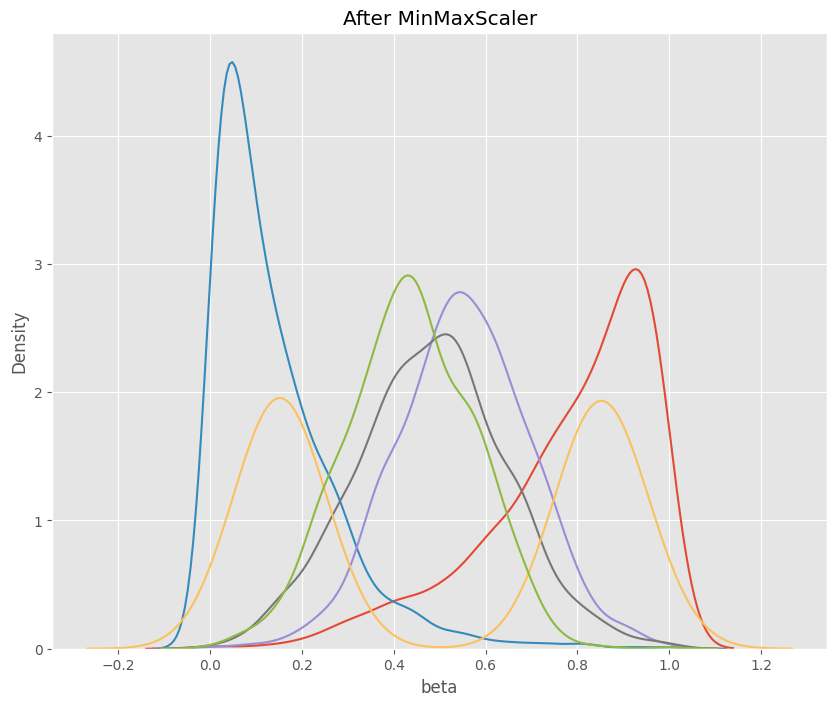

In [26]:
# Create a MinMaxScaler and transform the DataFrame
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame with column names
df_mm = pd.DataFrame(df_mm, columns=col_names)

# Plot KDE plots after applying MinMaxScaler
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

# Plot KDE plots for each column in the scaled DataFrame
sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1)

In [36]:
# Calculate the minimum and maximum values for the 'beta' column in the scaled DataFrame
df_mm['beta'].min()
print(df_mm['beta'].min())
df_mm['beta'].max()
print(df_mm['beta'].max())

0.0
1.0


In [38]:
# Calculate the minimum values for each column in the original DataFrame
mins = [df[col].min() for col in df.columns]
mins

[13.854021608409585,
 0.007616647999640711,
 2.356844136010337,
 -19.539980266046484,
 -28.709856256186555,
 969207.9390261483]

In [40]:
# Calculate the maximum values for each column in the original DataFrame
maxs = [df[col].max() for col in df.columns]
maxs

[59.99064035594787,
 71.3443406149087,
 16.214363985744633,
 42.07291533170829,
 28.252151215165426,
 1040677.4560143511]

In [42]:
# Calculate the minimum values for each column in the scaled DataFrame
mins = [df_mm[col].min() for col in df_mm.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [43]:
# Calculate the maximum values for each column in the scaled DataFrame
maxs = [df_mm[col].max() for col in df_mm.columns]
maxs

[1.0, 1.0, 1.0000000000000002, 0.9999999999999999, 1.0, 1.0]

<Axes: title={'center': 'After RobustScaler'}, xlabel='beta', ylabel='Density'>

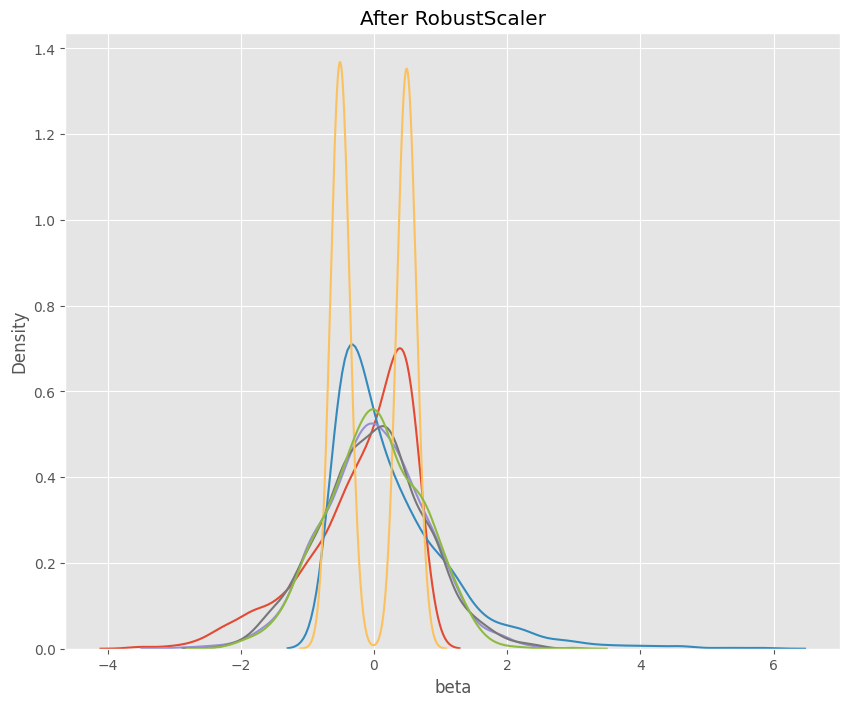

In [45]:
# Create a RobustScaler and transform the DataFrame
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame with column names
df_r = pd.DataFrame(df_r, columns=col_names)

# Plot KDE plots after applying RobustScaler
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

# Plot KDE plots for each column in the RobustScaler-transformed DataFrame
sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
sns.kdeplot(df_r['bimodal'], ax=ax1)
sns.kdeplot(df_r['normal_big'], ax=ax1)

In [46]:
# Calculate the minimum values for each column in the RobustScaler-transformed DataFrame
mins = [df_r[col].min() for col in df_r.columns]
mins

[-3.521256013025104,
 -0.6332678488395711,
 -2.91156392760608,
 -2.2889157521406003,
 -0.7257316470250651,
 -2.2626655321280853]

In [47]:
# Calculate the maximum values for each column in the RobustScaler-transformed DataFrame
maxs = [df_r[col].max() for col in df_r.columns]
maxs

[0.700265390227522,
 5.810261462820452,
 2.3787055278781155,
 2.433017414912012,
 0.7023702913932945,
 2.9482173719311295]

<Axes: title={'center': 'After StandardScaler'}, xlabel='beta', ylabel='Density'>

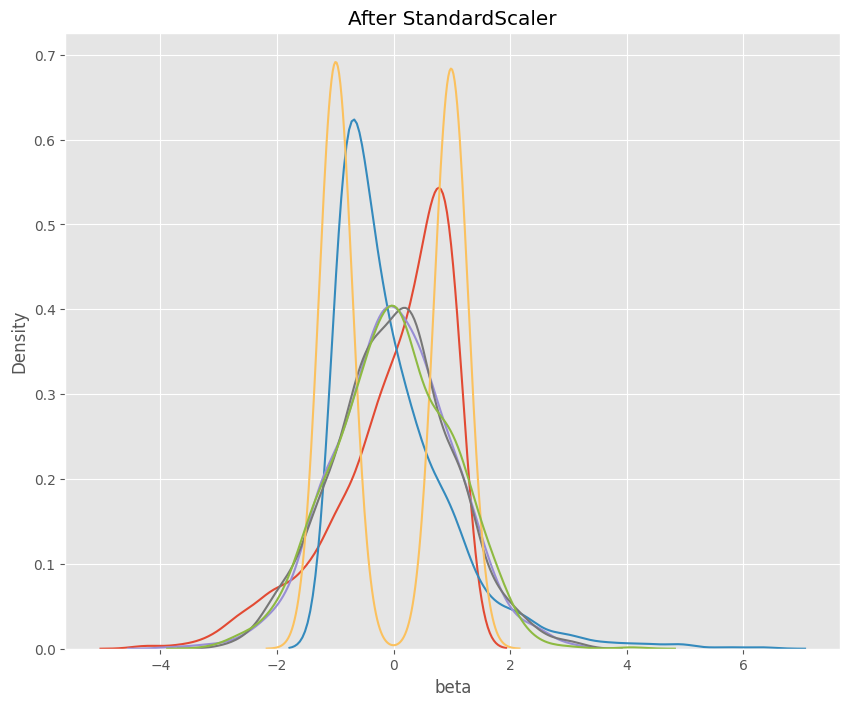

In [48]:
# Create a StandardScaler and transform the DataFrame
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame with column names
df_s = pd.DataFrame(df_s, columns=col_names)

# Plot KDE plots after applying StandardScaler
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

# Plot KDE plots for each column in the StandardScaler-transformed DataFrame
sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
sns.kdeplot(df_s['bimodal'], ax=ax1)
sns.kdeplot(df_s['normal_big'], ax=ax1)

In [49]:
# Calculate the minimum values for each column in the StandardScaler-transformed DataFrame
mins = [df_s[col].min() for col in df_s.columns]
mins

[-4.270238356986723,
 -1.0299834064894655,
 -3.7939883106225425,
 -2.9424568517799368,
 -1.4206429830609901,
 -3.126779701794258]

In [50]:
# Calculate the maximum values for each column in the StandardScaler-transformed DataFrame
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.1766269856411702,
 6.302351061844018,
 3.0901485502210164,
 3.158463886242835,
 1.4055370928053141,
 4.070121916594157]

<Axes: title={'center': 'After Normalizer'}, xlabel='beta', ylabel='Density'>

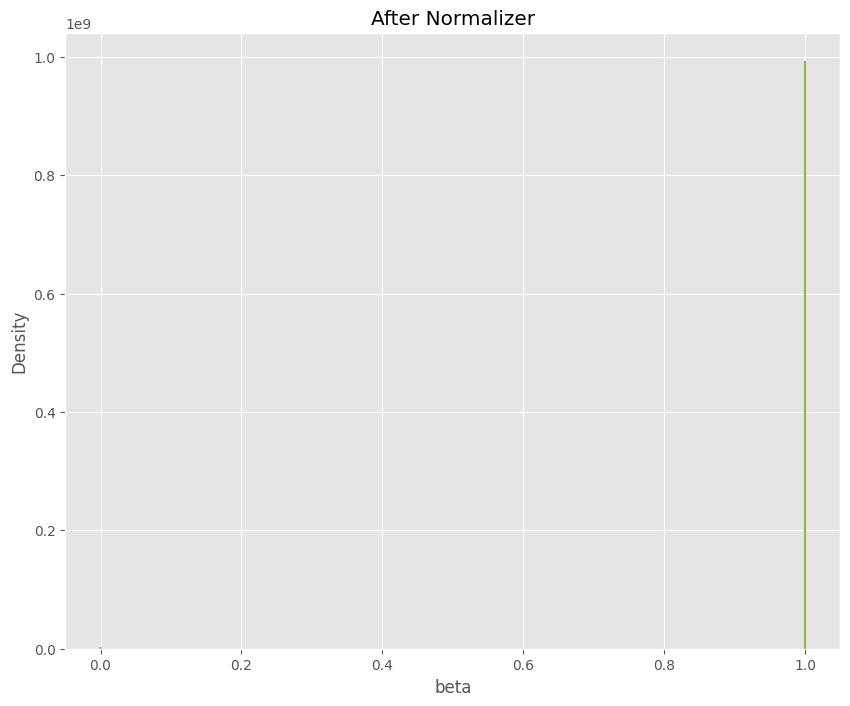

In [51]:
# Create a Normalizer and transform the DataFrame
n_scaler = preprocessing.Normalizer()
df_n = n_scaler.fit_transform(df)

# Convert the normalized array back to a DataFrame with column names
df_n = pd.DataFrame(df_n, columns=col_names)

# Plot KDE plots after applying Normalizer
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Normalizer')

# Plot KDE plots for each column in the Normalizer-transformed DataFrame
sns.kdeplot(df_n['beta'], ax=ax1)
sns.kdeplot(df_n['exponential'], ax=ax1)
sns.kdeplot(df_n['normal_p'], ax=ax1)
sns.kdeplot(df_n['normal_l'], ax=ax1)
sns.kdeplot(df_n['bimodal'], ax=ax1)
sns.kdeplot(df_n['normal_big'], ax=ax1)

In [52]:
# Calculate the minimum values for each column in the Normalizer-transformed DataFrame
mins = [df_n[col].min() for col in df_n.columns]
mins

[1.3827732328245718e-05,
 7.506766221580962e-09,
 2.3413976491231327e-06,
 -1.9569177313577106e-05,
 -2.8641556621580004e-05,
 0.9999999959175602]

In [53]:
# Calculate the maximum values for each column in the Normalizer-transformed DataFrame
maxs = [df_n[col].max() for col in df_n.columns]
maxs

[6.0917225507124665e-05,
 7.142164283270129e-05,
 1.6544412294111953e-05,
 4.190267415662595e-05,
 2.8265467956698925e-05,
 0.9999999995621566]

<Axes: title={'center': 'After StandardScaler'}, xlabel='beta', ylabel='Density'>

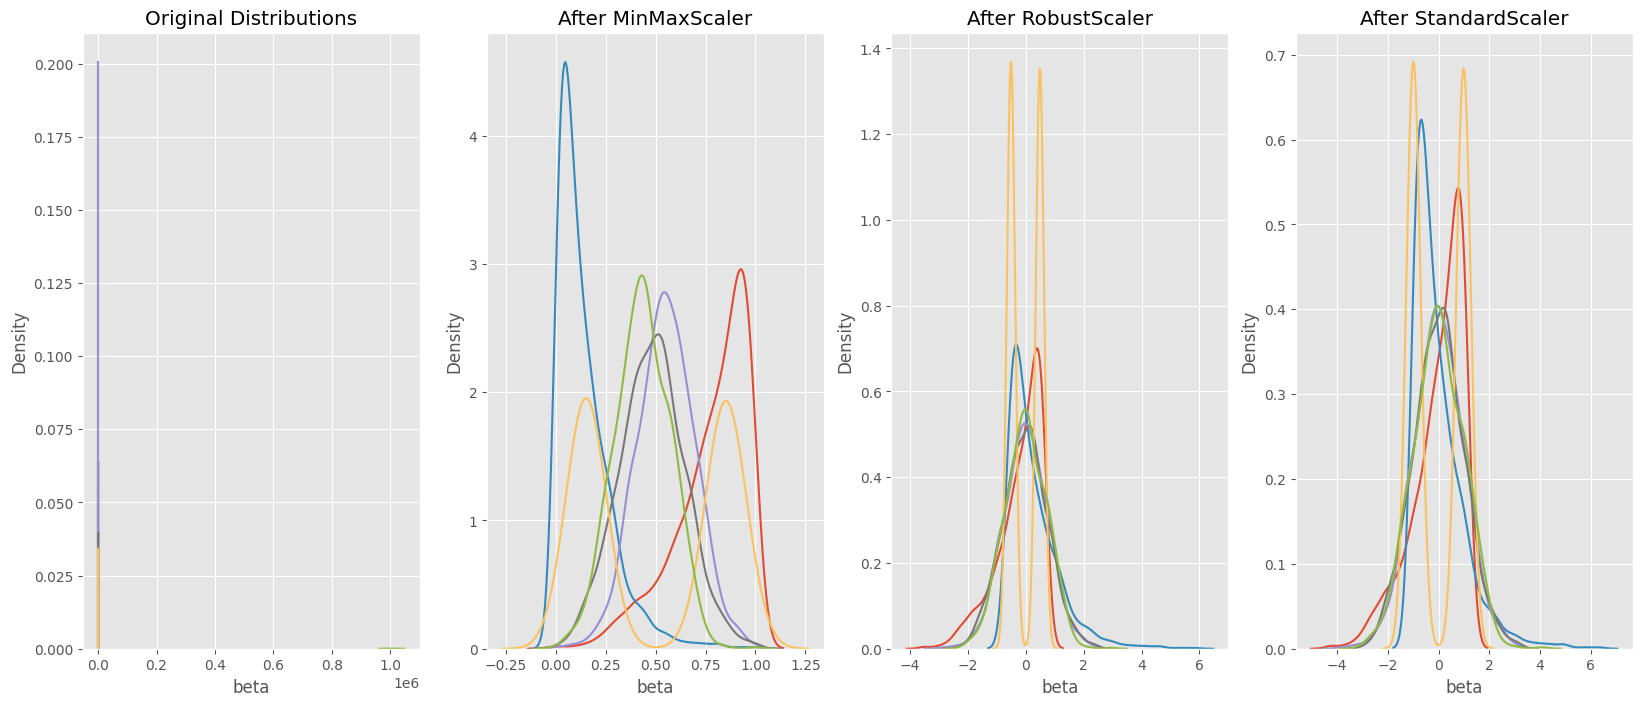

In [55]:
# Combined plot of KDE plots for different scalers
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 8))

# Original Distributions
ax0.set_title('Original Distributions')
sns.kdeplot(df['beta'], ax=ax0)
sns.kdeplot(df['exponential'], ax=ax0)
sns.kdeplot(df['normal_p'], ax=ax0)
sns.kdeplot(df['normal_l'], ax=ax0)
sns.kdeplot(df['bimodal'], ax=ax0)
sns.kdeplot(df['normal_big'], ax=ax0)

# After MinMaxScaler
ax1.set_title('After MinMaxScaler')
sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1)

# After RobustScaler
ax2.set_title('After RobustScaler')
sns.kdeplot(df_r['beta'], ax=ax2)
sns.kdeplot(df_r['exponential'], ax=ax2)
sns.kdeplot(df_r['normal_p'], ax=ax2)
sns.kdeplot(df_r['normal_l'], ax=ax2)
sns.kdeplot(df_r['bimodal'], ax=ax2)
sns.kdeplot(df_r['normal_big'], ax=ax2)

# After StandardScaler
ax3.set_title('After StandardScaler')
sns.kdeplot(df_s['beta'], ax=ax3)
sns.kdeplot(df_s['exponential'], ax=ax3)
sns.kdeplot(df_s['normal_p'], ax=ax3)
sns.kdeplot(df_s['normal_l'], ax=ax3)
sns.kdeplot(df_s['bimodal'], ax=ax3)
sns.kdeplot(df_s['normal_big'], ax=ax3)
